# Math stat hw2

## Setting

In [45]:
import pandas as pd
import numpy as np
import scipy

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)

## Task 1

Для вибiрки з 25 чисел, згенерованої за допомогою генератора випадкових чисел:

1. Побудуйте варiацiйний ряд i знайдiть розмах;

In [48]:
N = 25
numbers = np.round(np.random.uniform(0, 100, size=(N,)), 2)
numbers

array([28.35, 34.75, 31.83, 71.87, 38.41,  3.22, 64.68, 95.93, 59.27,
       64.14,  5.93,  7.84, 45.64, 37.03, 12.96, 93.78, 94.41, 36.29,
       10.69, 85.28, 91.63, 88.09, 93.09,  7.1 , 22.22])

In [49]:
numbers.sort()
numbers

array([ 3.22,  5.93,  7.1 ,  7.84, 10.69, 12.96, 22.22, 28.35, 31.83,
       34.75, 36.29, 37.03, 38.41, 45.64, 59.27, 64.14, 64.68, 71.87,
       85.28, 88.09, 91.63, 93.09, 93.78, 94.41, 95.93])

2. Знайдiть вибiркову медiану та квартилi, побудуйте дiаграму розмаху;

In [50]:
np.median(numbers)

38.41

In [51]:
np.quantile(numbers, [0.25, 0.5, 0.75])

array([22.22, 38.41, 85.28])

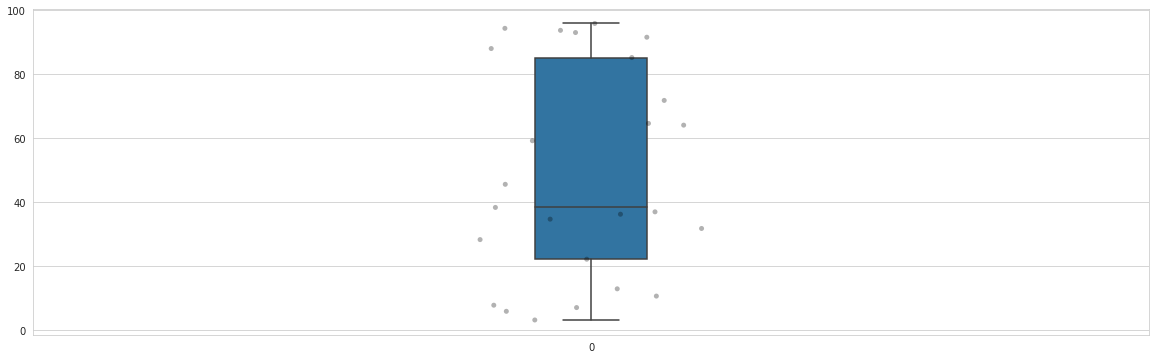

In [52]:
sns.set_style('whitegrid')
sns.boxplot(data=numbers, width=0.1)
sns.stripplot(data=numbers, alpha=0.3, marker="o", color="black")
plt.show()

3. Знайдiть значення емпiричної функцiї розподiлу в точцi 30 та побудуйте наближений 95%-й довiрчий iнтеграл для значення iстинної функцiї розподiлу в цiй точцi методами Вальда та Вiлсона;

In [53]:
def ecdf(x, a):
    a = np.array(a)
    return (x < a[:, np.newaxis]).mean(axis=1)

In [54]:
th = ecdf(numbers, [30])
th

array([0.32])

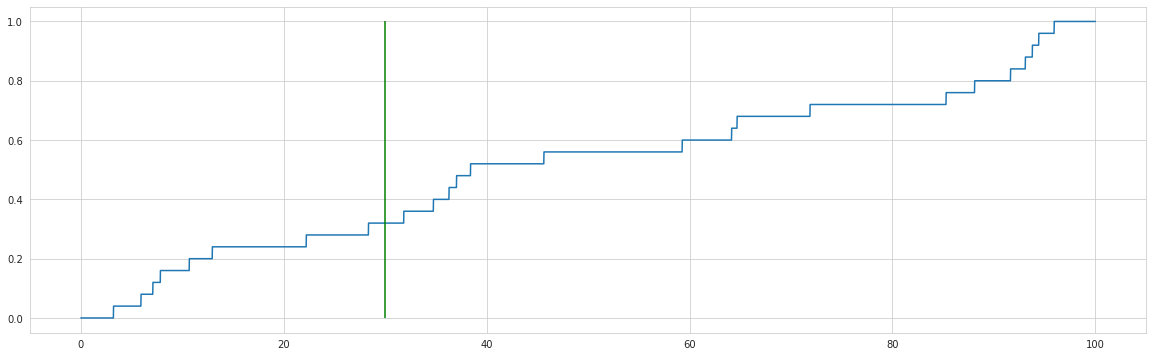

In [82]:
x = np.linspace(0, 100, 10000)
y = ecdf(numbers, x)
plt.plot(x, y)
plt.vlines(x=30, ymin=0, ymax=1, color='green')

In [56]:
z = scipy.stats.norm.ppf(1-0.05/2)
z

1.959963984540054

In [57]:
# метод Вальда 
def interv1(th):
    delta = z * (th * (1 - th) / N) ** 0.5
    interv1 = (th - delta, th + delta)
    return interv1

In [58]:
# метод Вільсона
def interv2(th):
    delta = z / (N + z**2) * (N * th * (1-th) + z**2/4) ** 0.5
    c = (N * th + z**2/2) / (N + z**2)
    interv2 = (c - delta, c + delta)
    return interv2

In [59]:
x = np.linspace(0, 100, 500, endpoint=False)
th = ecdf(numbers, x)
in1 = interv1(th)
in2 = interv2(th)

In [60]:
in1[0][30], in1[1][30]

(-0.026344979985533423, 0.18634497998553343)

In [61]:
in2[0][30], in2[1][30]

(0.022220401284847605, 0.24966108950395316)

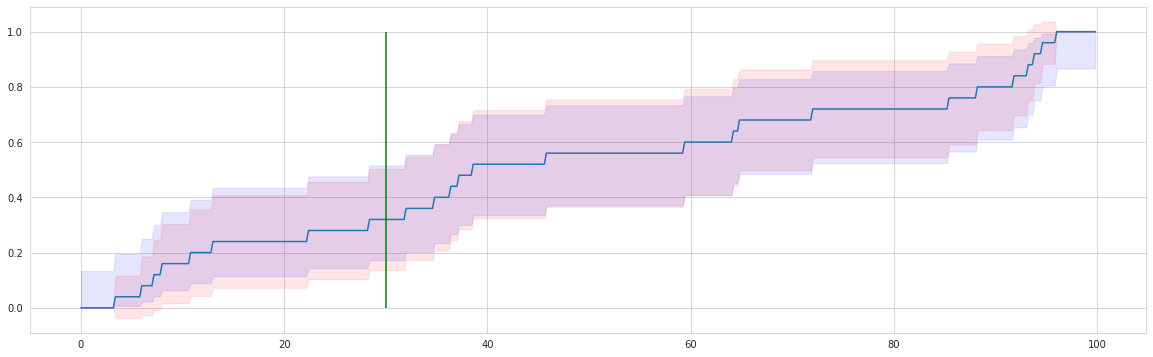

In [62]:
plt.plot(x, th)
plt.fill_between(x, in1[0], in1[1], color='red', alpha=0.1)
plt.fill_between(x, in2[0], in2[1], color='blue', alpha=0.1)
plt.vlines(x=30, ymin=0, ymax=1, color='green')

4. Знайдiть вибiркове середнє

In [63]:
numbers.mean()

48.9772

In [64]:
numbers.std()

32.382515840496396

## Task 2

Для оцiнок студентiв iз математики (math score), взятих iз датасету "Успiшнiсть студентiв"

In [65]:
students = pd.read_csv('StudentsPerformance.csv')

In [66]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [93]:
mscores = students['math score']

1. побудуйте емпiричну функцiю розподiлу;

In [94]:
x = np.linspace(0, 100, 10000)
th = ecdf(mscores.to_numpy(), x)

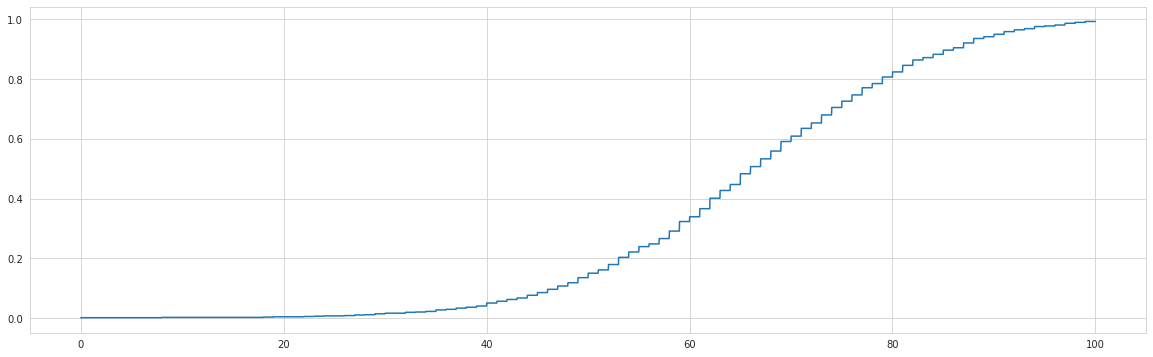

In [95]:
plt.plot(x, th)
plt.show()

2. побудуйте гiстограму значень;

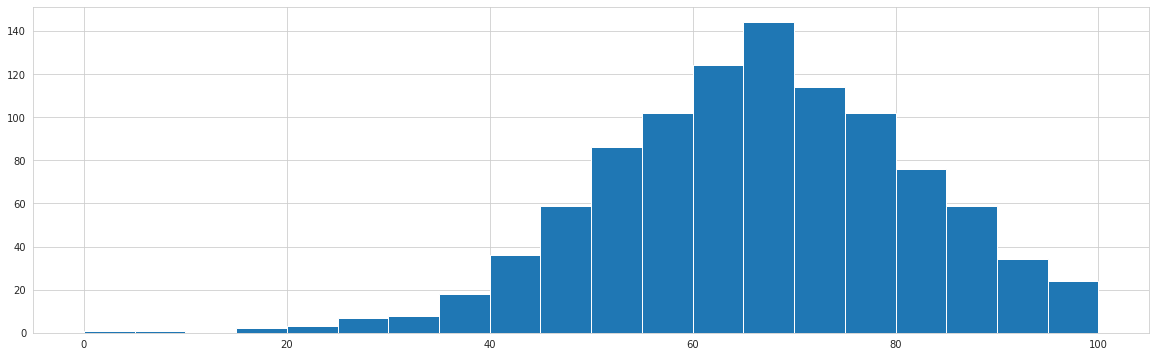

In [96]:
plt.hist(mscores, bins=20)
plt.show()

3. побудуйте дiаграму розсiяння для оцiнок з математики та читання;

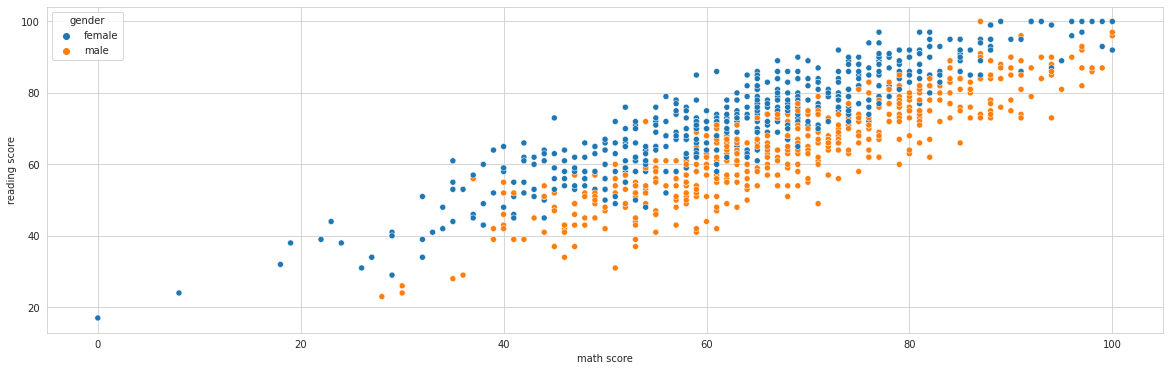

In [113]:
sns.scatterplot(data=students, x='math score', y='reading score', hue='gender')
plt.show()

4. знайдiть вибiрковi середнє та дисперсiю;

In [131]:
mscore_mean = mscores.mean()
mscore_mean

66.089

In [134]:
mscore_var = mscores.std(ddof=0) ** 2
mscore_var

229.68907899999996

5. побудуйте наближений 95 %-й довiрчий iнтервал для середньої оцiнки студентiв з математики;

Якщо $M$ -- випадкова величина, що відповідає math score студента, то 

$$\frac{\sqrt{N} \left(M - \mathbb{E} M\right)}{\sqrt{\mathbb{D}M}} \sim \mathcal{N} \left(0, 1\right)$$

In [190]:
delta = z * (mscore_var / len(mscores)) ** 0.5
mscore_mean - delta, mscore_mean + delta

(65.14966984582541, 67.02833015417458)

6. пояснiть, що означає отриманий у попередньому пунктi довiрчий iнтервал.

Якщо взяти багато вибірок студентів і для кожної порахувати такий довірчий інтервал, то справжнє мат сподівання оцінки буде попадати приблизно в 95% побудованих інтервалів.

## Task 3

1. Зробiть завдання 2 (крiм останнього пункту) окремо для студентiв, якi мали стандартний (standard) ланч, та для студентiв, якi мали безкоштовний або уцiнений ланч (free/reduced) ланч.

In [154]:
lstd = students[students['lunch'] == 'standard']
lred = students[students['lunch'] == 'free/reduced']

In [174]:
x = np.linspace(0, 100, 10000)
ecdf_std = ecdf(lstd['math score'].to_numpy(), x)
ecdf_red = ecdf(lred['math score'].to_numpy(), x)

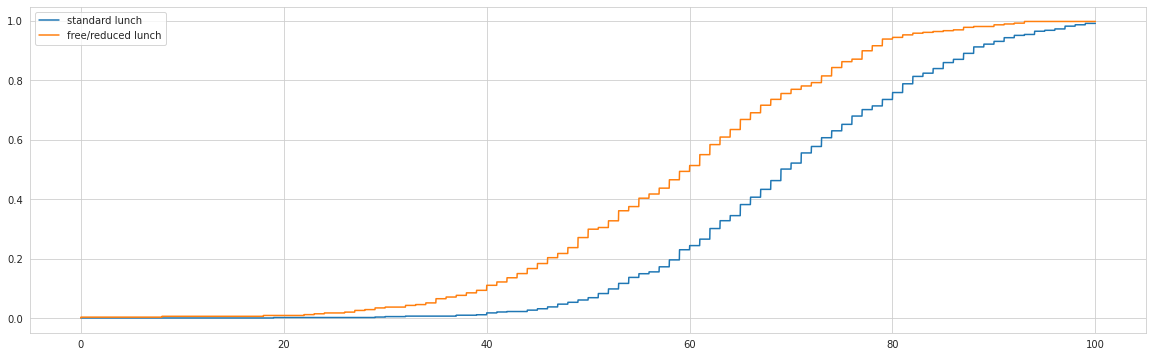

In [175]:
plt.plot(x, ecdf_std, label='standard lunch')
plt.plot(x, ecdf_red, label='free/reduced lunch')
plt.legend()
plt.show()

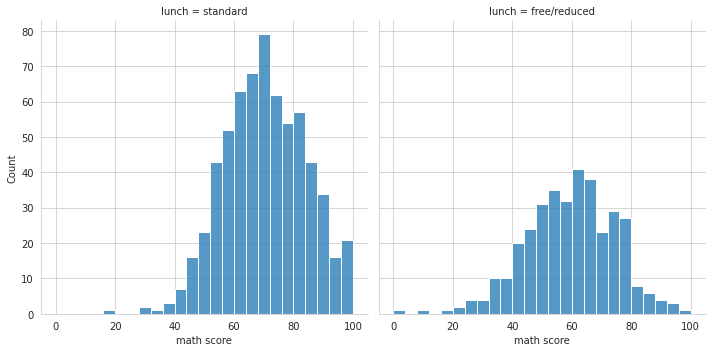

In [195]:
sns.displot(kind='hist', data=students, x='math score', col='lunch')
plt.show()

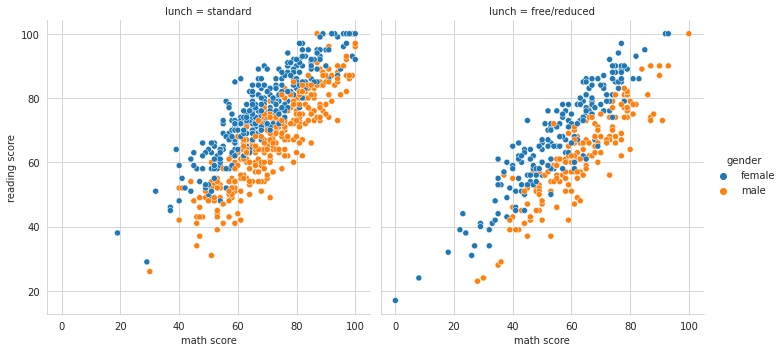

In [145]:
sns.relplot(kind='scatter', data=students, x='math score', y='reading score', hue='gender', col='lunch')
plt.show()

In [184]:
lstd_mean = lstd['math score'].mean()
lstd_var = lstd['math score'].std(ddof=0) ** 2
lstd_mean, lstd_var

(70.03410852713178, 186.12906916651647)

In [192]:
delta = z * (lstd_var / len(lstd)) ** 0.5
lstd_mean - delta, lstd_mean + delta

(68.98123710853935, 71.08697994572421)

In [181]:
lred_mean = lred['math score'].mean()
lred_var = lred['math score'].std(ddof=0) ** 2
lred_mean, lred_var

(58.92112676056338, 229.17687760365)

In [193]:
delta = z * (lred_var / len(lred)) ** 0.5
lred_mean - delta, lred_mean + delta

(57.346348852707955, 60.49590466841881)

2. Знайдiть наближений 95 %-й довiрчий iнтервал для рiзницi середнiх успiшностей з математики цих двох категорiй студентiв.

Різниця успішностей асимптотично має нормальний розподіл з матсподівнням, що дорівнює різниці матсподівань і дисперсією, що дорівнює сумі дисперсій

In [194]:
c = lstd_mean - lred_mean
delta = z * (lstd_var / len(lstd) + lred_var / len(lred)) ** 0.5
(c - delta, c + delta)

(9.218657696310522, 13.00730583682627)

3. Чи можна стверджувати, що студенти, якi мають стандартний ланч, є бiльш успiшними в математицi, нiж решта?

Різниця між середніми має наближений довірчий інтервал $(9, 13)$, тобто можна сказати, що з рівнем довіри $95%$ середня успішність студентів зі стандартним ланчем значно більша, ніж середня успішність студентів з free/reduced ланчем. 

4. Наведiть усi припущення, якi ви зробили, щоб дати вiдповiдь на попереднiй пункт, та прокоментуйте, наскiльки вони є реалiстичними.

Використовувалась незалежність успішностей у двох груп (для того, щоб сказати, що дисперція разниці це сума дисперсій), що є цілком реалістичним припущенням 